
# Python Project - Analysis of Loan Activities of Prosper Mortgage Firm

## by - Ukachi Imemba


## Introduction

> This is a review of the activities that affect the performance of Prosper Mortgage Firm. 
> This will be illustrated through the use of data wrangling and data visualization. 
> Insights from this analysis will aid the company in future financial activities and decision making.







## Preliminary Wrangling

In [3]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [5]:
 prosper = pd.read_csv('Prosper Loan.csv')
prosper

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [6]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
df = prosper
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [8]:
df.columns = df.columns.str.lower()
df

,listingkey,listingnumber,listingcreationdate,creditgrade,term,loanstatus,closeddate,borrowerapr,borrowerrate,lenderyield,...,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [69]:
df.listingcreationdate = pd.to_datetime(df.listingcreationdate, errors = 'coerce')




In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listingkey                           113937 non-null  object 
 1   listingnumber                        113937 non-null  int64  
 2   listingcreationdate                  113937 non-null  object 
 3   creditgrade                          28953 non-null   object 
 4   term                                 113937 non-null  int64  
 5   loanstatus                           113937 non-null  object 
 6   closeddate                           55089 non-null   object 
 7   borrowerapr                          113912 non-null  float64
 8   borrowerrate                         113937 non-null  float64
 9   lenderyield                          113937 non-null  float64
 10  estimatedeffectiveyield              84853 non-null   float64
 11  estimatedloss

In [31]:
 df.closeddate = pd.to_datetime(df.closeddate, errors = 'coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   listingkey                           113937 non-null  object        
 1   listingnumber                        113937 non-null  int64         
 2   listingcreationdate                  45425 non-null   datetime64[ns]
 3   creditgrade                          28953 non-null   object        
 4   term                                 113937 non-null  int64         
 5   loanstatus                           113937 non-null  object        
 6   closeddate                           55080 non-null   datetime64[ns]
 7   borrowerapr                          113912 non-null  float64       
 8   borrowerrate                         113937 non-null  float64       
 9   lenderyield                          113937 non-null  float64       
 

In [32]:
df

,listingkey,listingnumber,listingcreationdate,creditgrade,term,loanstatus,closeddate,borrowerapr,borrowerrate,lenderyield,...,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
0,1021339766868145413AB3B,193129,2023-02-06 09:29:18,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,NaT,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2023-02-06 00:47:06,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2023-02-06 02:35:00,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,NaT,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,NaT,NaN,36,Current,NaT,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,NaT,NaN,36,FinalPaymentInProgress,NaT,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,NaT,NaN,60,Current,NaT,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2023-02-06 18:26:36,NaN,60,Completed,2013-08-13,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


### What is the structure of your dataset?

> The dataset is made up of different data type : float, integer, string,boolean ad datetime.
> This can also be summarised as categories and quantities for measuring.
> The dataframe contains 81 columns and 113937 rows. 3 columns are coded as Boolean values, 49 columns are floats,12 columns are integers, 15 columns are objects ie string values while 2 columns are datetime.

> 

### What is/are the main feature(s) of interest in your dataset?

> Occupation and Employment Status of borrowers s well as there Income range
> Total prosper payment billed as well as total on time payment by the borrowers.
>Total number of investors, Prospers pricipal borrowed and principal outstanding

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The employment status and income range of the borrowers
> Total prosper payments billed and on time payment made by borrowers.


In [36]:
#To view the different categories and their frquency.
df.employmentstatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: employmentstatus, dtype: int64

In [16]:
#The column names were ovallaping each other so I had to use the rplace function to shorten the names.

df.employmentstatus =  df.employmentstatus.replace('Self-employed', 'Slfempld')
df.employmentstatus

df.employmentstatus = df.employmentstatus.replace('Full-time', 'Fulltime')
df.employmentstatus
df.employmentstatus = df.employmentstatus.replace('Not employed', 'Notemp.')
df.employmentstatus

df.employmentstatus = df.employmentstatus.replace('Not available', 'Notavail')
df.employmentstatus

df.employmentstatus = df.employmentstatus.replace('Self-employed', 'slfempld.')
df.employmentstatus
df.employmentstatus = df.employmentstatus.replace('Employed', 'Empld')
df.employmentstatus



0         Slfempld
1            Empld
2         Notavail
3            Empld
4            Empld
            ...   
113932       Empld
113933       Empld
113934       Empld
113935    Fulltime
113936       Empld
Name: employmentstatus, Length: 113937, dtype: object

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [17]:
df.employmentstatus.value_counts() 

Empld        67322
Fulltime     26355
Slfempld      6134
Notavail      5347
Other         3806
Part-time     1088
Notemp.        835
Retired        795
Name: employmentstatus, dtype: int64

QUESTION 1  What is the proportion of borrowers in each employment satus?

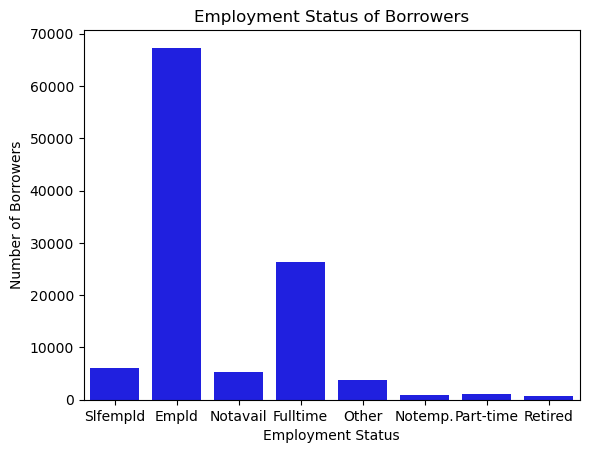

In [19]:
#The package has already been imported at the beginning.
sns.countplot(data = df,x = 'employmentstatus', color = 'blue');
plt.title('Employment Status of Borrowers')
plt.xlabel('Employment Status')
plt.ylabel('Number of Borrowers');

In [20]:
 df.isborrowerhomeowner.value_counts() 

True     57478
False    56459
Name: isborrowerhomeowner, dtype: int64

Question 2. To know whether the borrower is a home owner. In case of collateral and also being able to repay the loan.

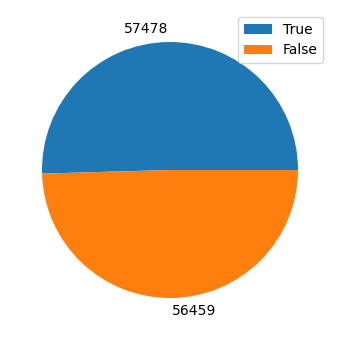

In [197]:
plt.pie(df.isborrowerhomeowner.value_counts(), labels =df.isborrowerhomeowner.value_counts()); 
labels = ('True', 'False')
plt.legend(labels)

In [21]:
# To view the different categories and their frequency.
df.totalprosperloans.value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
8.0        1
0.0        1
Name: totalprosperloans, dtype: int64

Question 3. What is the Total Number of Loans Borrowed. 
Meaning that some customer has different number of loans outstanding at Prosper loan.

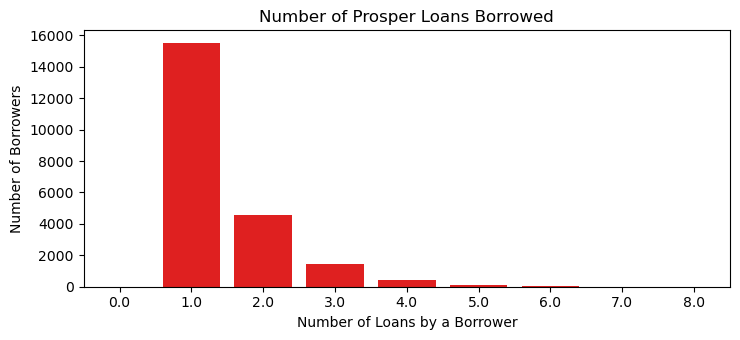

In [219]:
sns.countplot(data = df,x = 'totalprosperloans', color = 'red');
plt.title('Number of Prosper Loans Borrowed')
plt.xlabel('Number of Loans by a Borrower')
plt.ylabel('Number of Borrowers');

In [24]:
df.ontimeprosperpayments.value_counts()

9.0      1575
6.0      1234
10.0     1146
11.0     1039
35.0      832
         ... 
133.0       1
121.0       1
115.0       1
119.0       1
141.0       1
Name: ontimeprosperpayments, Length: 127, dtype: int64

Question 4. To illustrate the number of on time payment made by the borrower.

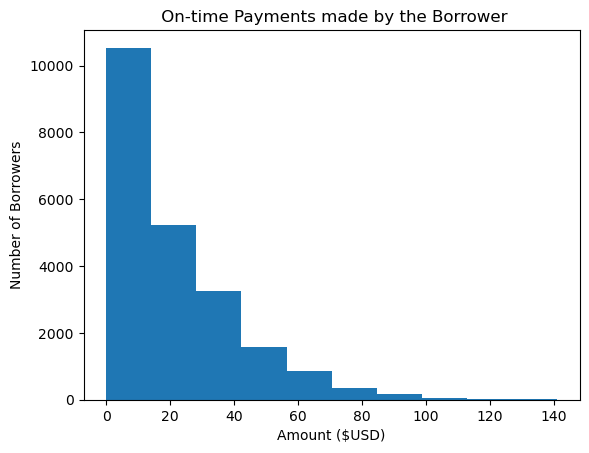

In [30]:
plt.hist(data = df, x = 'ontimeprosperpayments',);

plt.title(' On-time Payments made by the Borrower')
plt.xlabel('Amount ($USD)')
plt.ylabel('Number of Borrowers');



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the chart in Question one, over 67,000 borrowers are employed, with over 26,000 being on full time employmennt. 
  This means that most of the borrowers are gainfully employed aand will be able to repay the loan on time.
> Most of the borrowers have one outstanding loan (over 15,000). This means that most of the customer prefers taking
  another loan after repaying the outstanding one.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to replace the catrgories names with shorter names to avoid overlapping.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [227]:
df.incomerange.value_counts() 

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: incomerange, dtype: int64

In [65]:
# Used the replace function to shorten the column titles

df.incomerange = df.incomerange.replace('$25,000-49,999', '$25K-49K')
df.incomerange
df.incomerange = df.incomerange.replace('$50,000-74,999', '$50K-74K')
df.incomerange
df.incomerange = df.incomerange.replace('$75,000-99,999', '$75K-99K')
df.incomerange
df.incomerange = df.incomerange.replace('Not displayed', 'Notdispld')
df.incomerange
df.incomerange = df.incomerange.replace('Not employed', 'Notempld')
df.incomerange = df.incomerange.replace('$1-24,999', '$1K-$24K')
df.incomerange
df.incomerange = df.incomerange.replace('$100,000+', '$100K+')
df.incomerange



0          $25K-49K
1          $50K-74K
2         Notdispld
3          $25K-49K
4            $100K+
            ...    
113932     $50K-74K
113933     $75K-99K
113934     $25K-49K
113935     $25K-49K
113936     $50K-74K
Name: incomerange, Length: 113937, dtype: object

In [57]:
df.incomerange.value_counts()

$25K-49K     32192
$50K-74K     31050
$100K+       17337
$75K-99K     16916
Notdispld     7741
$1K-$24K      7274
Notempld       806
$0             621
Name: incomerange, dtype: int64

Question 5.  What are the income range of the borrowers.

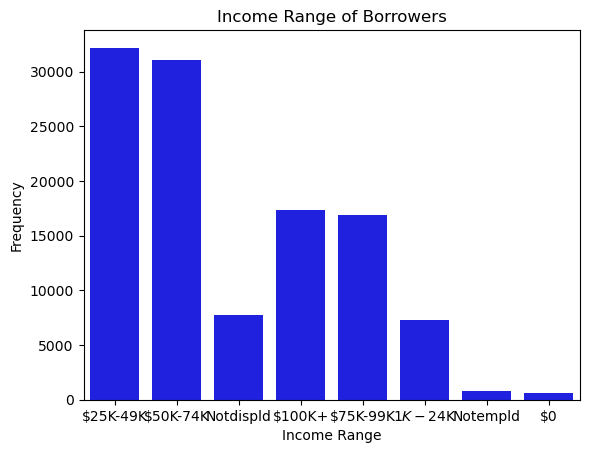

In [68]:
sns.countplot(data = df,x = 'incomerange', color = 'blue');
plt.title('Income Range of Borrowers')
plt.xlabel('Income Range')
plt.ylabel('Frequency');

In [27]:
df.totalprosperpaymentsbilled.value_counts() 

9.0      1633
6.0      1219
10.0     1144
35.0     1069
11.0     1041
         ... 
120.0       1
133.0       1
121.0       1
113.0       1
141.0       1
Name: totalprosperpaymentsbilled, Length: 130, dtype: int64

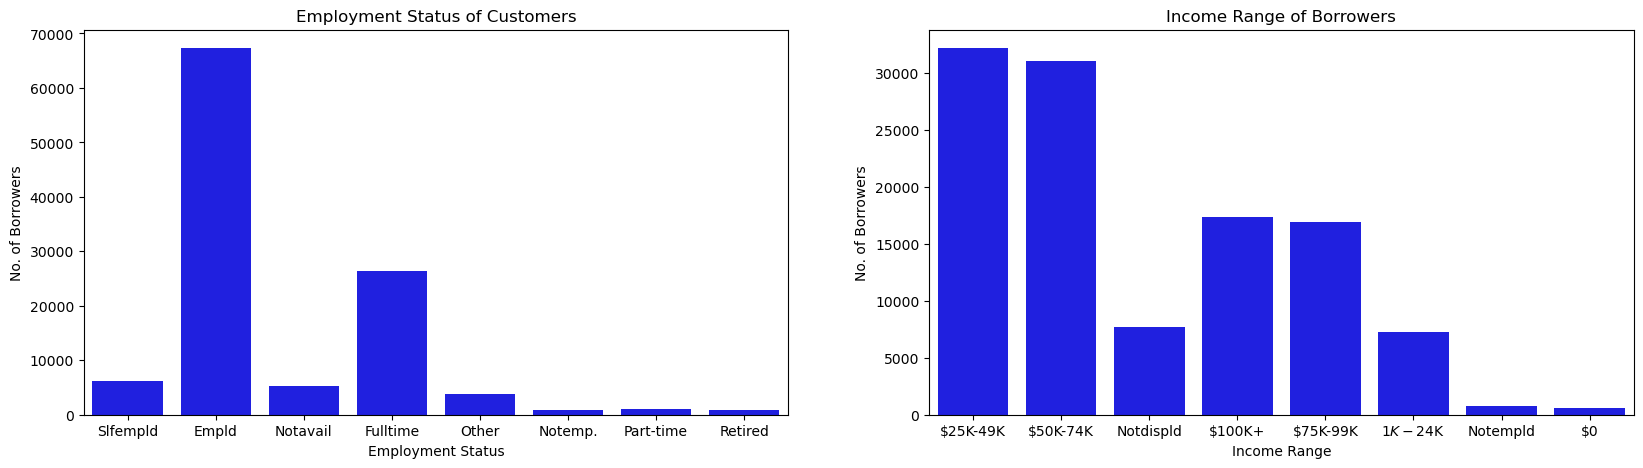

In [66]:
# Plotting a side by side chart showing the relationship between the employment status of borrowers and their income range.

plt.figure(figsize =[20,5])

plt.subplot(1,2,1)
sns.countplot(data = df,x = 'employmentstatus', color = 'blue');
plt.title('Employment Status of Customers')
plt.xlabel('Employment Status')
plt.ylabel('No. of Borrowers');


plt.subplot(1,2,2,)
sns.countplot(data = df,x = 'incomerange', color = 'blue');
plt.title('Income Range of Borrowers')
plt.xlabel('Income Range')
plt.ylabel('No. of Borrowers');
plt.show()



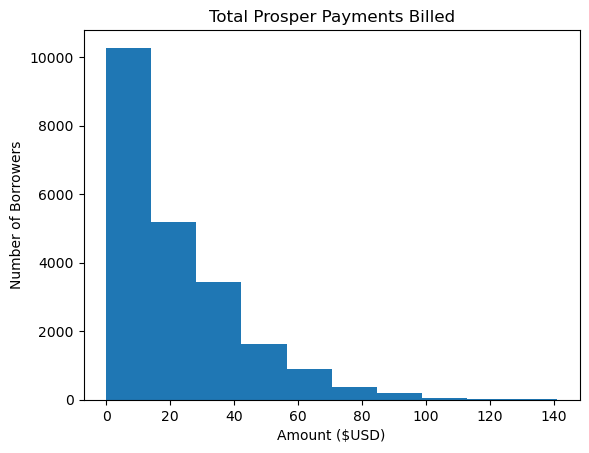

In [31]:
plt.hist(data = df, x = 'totalprosperpaymentsbilled',);

plt.title('Total Prosper Payments Billed')
plt.xlabel('Amount ($USD)')
plt.ylabel('Number of Borrowers');


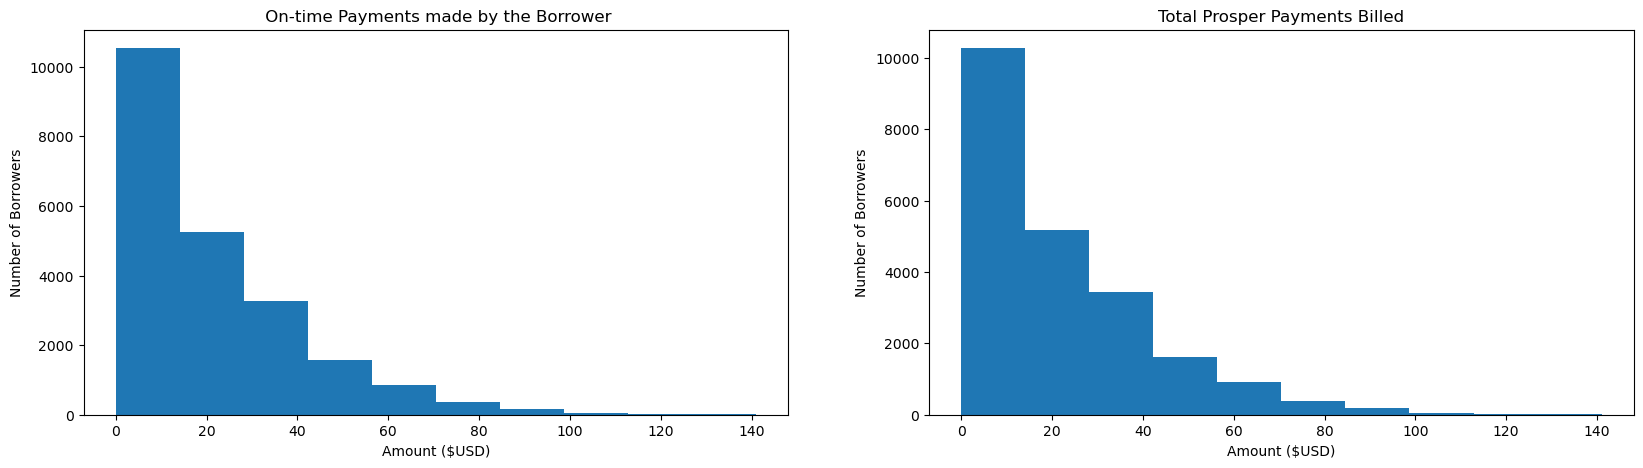

In [36]:
# Side by side chart showing the relationship between the total prosper payment billed and the ontime payment of the borowers.

plt.figure(figsize =[20,5])

plt.subplot(1,2,1)

plt.hist(data = df, x = 'ontimeprosperpayments');
            
plt.title(' On-time Payments made by the Borrower')
plt.xlabel('Amount ($USD)')
plt.ylabel('Number of Borrowers');
            
plt.subplot(1,2,2)
    
plt.hist(data = df, x = 'totalprosperpaymentsbilled',);

plt.title('Total Prosper Payments Billed')
plt.xlabel('Amount ($USD)')
plt.ylabel('Number of Borrowers');

plt.show()


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Majority of the borrowers are employed. Borrowers with income range between $25k - $74k are the majority followed by those with income range between $75k - $100k.

>There is not much difference between the total payment billed and the on time payment made by the borrower.

## Conclusions
>The above illustrations shows that most of the customers of prosper loan are employed with good range of income.
> 50% of the borrowers are also home owner, meaning their loan might be with colateral, thus the company will not be distressed in case of default.
>There is not much diffeence between the total prosper payment billed and the ontime payment made by the borrower.
